In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Import all the necessary libraries 

### Load the dataset and learn the data 

In [246]:
df = pd.read_csv('Covid data.csv')

In [247]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [248]:
df.tail(1)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
1048574,2,13,2,1,9999-99-99,97,2,52,97,2,...,2,2,2,2,2,2,2,2,7,97


In [249]:
print(f'Shape of the dataset is : {df.shape[0]}, {df.shape[1]}')

Shape of the dataset is : 1048575, 21


In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [251]:
df.dtypes

USMER                    int64
MEDICAL_UNIT             int64
SEX                      int64
PATIENT_TYPE             int64
DATE_DIED               object
INTUBED                  int64
PNEUMONIA                int64
AGE                      int64
PREGNANT                 int64
DIABETES                 int64
COPD                     int64
ASTHMA                   int64
INMSUPR                  int64
HIPERTENSION             int64
OTHER_DISEASE            int64
CARDIOVASCULAR           int64
OBESITY                  int64
RENAL_CHRONIC            int64
TOBACCO                  int64
CLASIFFICATION_FINAL     int64
ICU                      int64
dtype: object

### Most binary categorical fields use the following coding scheme:

#### 1 = Yes / Positive
#### 2 = No / Negative
#### 97, 99 = Missing values
#### 9999-99-99 represents that the person didn't die 

### Since the missing values are represented as 97, 99. Going to convert them to Nan and then clean it 

In [252]:
cols = df.columns

df[cols].isin([96, 97, 99,'9999-99-99']).any().count()

21

In [253]:
mv = df[cols].isin([96, 97, 99, '9999-99-99']).sum()
mp = (mv / len(df))*100

data = pd.DataFrame({'Missing values : ' : mv, 'Missing Percent : ' : mp})
data

,Missing values :,Missing Percent :
USMER,0,0.000000
MEDICAL_UNIT,0,0.000000
SEX,0,0.000000
PATIENT_TYPE,0,0.000000
DATE_DIED,971633,92.662232
INTUBED,855869,81.622106
PNEUMONIA,16003,1.526166
AGE,416,0.039673
PREGNANT,523511,49.925947
DIABETES,0,0.000000


In [254]:
for col in cols:
    print(df[col].value_counts(normalize=True, dropna=False) * 100)

USMER
2    63.219417
1    36.780583
Name: proportion, dtype: float64
MEDICAL_UNIT
12    57.506139
4     29.984026
6      3.870396
9      3.635028
3      1.828672
8      0.991727
10     0.750829
5      0.690842
11     0.531865
13     0.094986
7      0.084972
2      0.016117
1      0.014400
Name: proportion, dtype: float64
SEX
1    50.074053
2    49.925947
Name: proportion, dtype: float64
PATIENT_TYPE
1    80.923539
2    19.076461
Name: proportion, dtype: float64
DATE_DIED
9999-99-99    92.662232
06/07/2020     0.095368
07/07/2020     0.094986
13/07/2020     0.094414
16/06/2020     0.093365
                ...    
24/11/2020     0.000095
17/12/2020     0.000095
08/12/2020     0.000095
16/03/2021     0.000095
22/04/2021     0.000095
Name: proportion, Length: 401, dtype: float64
INTUBED
97    80.923539
2     15.168204
1      3.209689
99     0.698567
Name: proportion, dtype: float64
PNEUMONIA
2     85.118756
1     13.355077
99     1.526166
Name: proportion, dtype: float64
AGE
30     2.57587

In [255]:
df[cols] = df[cols].replace([96, 97, 98, 99], np.nan)

In [256]:
mv = df[cols].isin([96, 97, 98,99]).sum()
mp = (mv / len(df))*100

data = pd.DataFrame({'Missing values : ' : mv, 'Missing Percent : ' : mp})
data

,Missing values :,Missing Percent :
USMER,0,0.0
MEDICAL_UNIT,0,0.0
SEX,0,0.0
PATIENT_TYPE,0,0.0
DATE_DIED,0,0.0
INTUBED,0,0.0
PNEUMONIA,0,0.0
AGE,0,0.0
PREGNANT,0,0.0
DIABETES,0,0.0


In [257]:
print('Missing Percentage of each column : ')
(df.isna().sum() / len(df) * 100).sort_values(ascending=False)

Missing Percentage of each column : 


ICU                     81.637651
INTUBED                 81.622106
PREGNANT                50.283957
PNEUMONIA                1.526166
OTHER_DISEASE            0.481129
INMSUPR                  0.324631
DIABETES                 0.318337
TOBACCO                  0.307083
HIPERTENSION             0.296021
CARDIOVASCULAR           0.293350
OBESITY                  0.289154
RENAL_CHRONIC            0.286675
COPD                     0.286389
ASTHMA                   0.284100
AGE                      0.051498
MEDICAL_UNIT             0.000000
DATE_DIED                0.000000
PATIENT_TYPE             0.000000
SEX                      0.000000
CLASIFFICATION_FINAL     0.000000
USMER                    0.000000
dtype: float64

### Handling the columns as per the missing values

1. **Removing these columns** (missing values > 80%):
   - `ICU`
   - `INTUBED`

2. **Filling `"Unknown"` for columns with ~50% missing values**:
   - `PREGNANT`

3. **Filling numeric columns with mean/median (low missing %)**:
   - `PNEUMONIA`
   - `OTHER_DISEASE`
   - `INMSUPR`
   - `DIABETES`
   - `TOBACCO`
   - `HIPERTENSION`
   - `CARDIOVASCULAR`
   - `OBESITY`
   - `RENAL_CHRONIC`
   - `COPD`
   - `ASTHMA`
   - `AGE`


In [258]:
df.drop(columns=['ICU', 'INTUBED'], inplace=True)

In [259]:
df['PREGNANT'].value_counts(normalize = True)

PREGNANT
2.0    0.984403
1.0    0.015597
Name: proportion, dtype: float64

In [260]:
df['PREGNANT'] = df['PREGNANT'].fillna('Unknown')

In [261]:
df['PREGNANT'] = df['PREGNANT'].apply(lambda x: 'Yes' if x == 1.0 else 'Unknown' if x == 2.0 else 'No')

In [262]:
df['PREGNANT'] = df['PREGNANT'].astype('category')

In [263]:
df['PREGNANT'].value_counts(normalize = True)

PREGNANT
No         0.502840
Unknown    0.489406
Yes        0.007754
Name: proportion, dtype: float64

In [264]:
cols = ['PNEUMONIA', 'AGE', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO']

for col in cols:
    df[col] = df[col].fillna(df[col].mode()[0])

df.isnull().any().sum()

0

In [265]:
df['DEATH_STATUS'] = df['DATE_DIED'].apply(lambda x: 'ALIVE' if x == '9999-99-99' else 'DEAD')

In [266]:
df.drop(columns = ['DATE_DIED'], inplace = True)

### Converting some numerical columns to categorical columns 

In [267]:
cols = df[['USMER', 'PNEUMONIA', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION',
       'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC',
       'TOBACCO']]
for col in cols:
    print(col, df[col].unique())

USMER [2 1]
PNEUMONIA [1. 2.]
DIABETES [2. 1.]
COPD [2. 1.]
ASTHMA [2. 1.]
INMSUPR [2. 1.]
HIPERTENSION [1. 2.]
OTHER_DISEASE [2. 1.]
CARDIOVASCULAR [2. 1.]
OBESITY [2. 1.]
RENAL_CHRONIC [2. 1.]
TOBACCO [2. 1.]


## Column Mappings
### 1. USMER
-  `USMER`
-  **1** - Level 1
-  **2** - Level 2
### 2. Yes / No Columns
- `PNEUMONIA`, `DIABETES`, `COPD`, `ASTHMA`, `INMSUPR`, `HIPERTENSION`,
  `OTHER_DISEASE`, `CARDIOVASCULAR`, `OBESITY`, `RENAL_CHRONIC`, `TOBACCO`  
- **1** - Yes  
- **2** - No   

### 3. `SEX`
- **1** - Female  
- **2** - Male  

### 4. `PATIENT_TYPE`
- **1** - Outpatient  
- **2** - Hospitalized  

### 5. `CLASSIFICATION_FINAL` (COVID-19 Classification)
- **1** - Laboratory Test  
- **2** - Epidemiologic Link  
- **3** - Expert Judgement  
- **4** - Suspected Case  
- **5** - Not COVID-19  
- **6** - Pending Result  
- **7** - Invalid  


In [268]:
cols = df[['PNEUMONIA', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION',
       'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC',
       'TOBACCO']]
for col in cols:
    df[col] = df[col].apply(lambda x : 'Yes' if x == 1 else 'No')

In [269]:
df['SEX'] = df['SEX'].apply(lambda x : 'Female' if x == 1 else 'Male')
df['PATIENT_TYPE'] = df['PATIENT_TYPE'].apply(lambda x : 'Outpatient' if x == 1 else 'Hospitalized')
df['USMER'] = df['USMER'].apply(lambda x : 'Level-1' if x == 1 else 'Level-2')

In [270]:
df['CLASIFFICATION_FINAL'] = df['CLASIFFICATION_FINAL'].map({
    1: "Laboratory Test", 2: "Epidemiologic Link", 3: "Expert Judgement", 4: "Suspected Case", 5: "Not COVID-19", 6: "Pending Result", 7: "Invalid"
})

In [271]:
df['AGE'] = df['AGE'].astype(int)

In [272]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,DEATH_STATUS
0,Level-2,1,Female,Outpatient,Yes,65,Unknown,No,No,No,No,Yes,No,No,No,No,No,Expert Judgement,DEAD
1,Level-2,1,Male,Outpatient,Yes,72,No,No,No,No,No,Yes,No,No,Yes,Yes,No,Not COVID-19,DEAD
2,Level-2,1,Male,Hospitalized,No,55,No,Yes,No,No,No,No,No,No,No,No,No,Expert Judgement,DEAD
3,Level-2,1,Female,Outpatient,No,53,Unknown,No,No,No,No,No,No,No,No,No,No,Invalid,DEAD
4,Level-2,1,Male,Outpatient,No,68,No,Yes,No,No,No,Yes,No,No,No,No,No,Expert Judgement,DEAD


### It looks like there are some age data > 100

In [273]:
df['AGE'].sort_values(ascending=False).unique()

array([121, 120, 119, 118, 117, 116, 115, 114, 113, 111, 110, 109, 108,
       107, 106, 105, 104, 103, 102, 101, 100,  95,  94,  93,  92,  91,
        90,  89,  88,  87,  86,  85,  84,  83,  82,  81,  80,  79,  78,
        77,  76,  75,  74,  73,  72,  71,  70,  69,  68,  67,  66,  65,
        64,  63,  62,  61,  60,  59,  58,  57,  56,  55,  54,  53,  52,
        51,  50,  49,  48,  47,  46,  45,  44,  43,  42,  41,  40,  39,
        38,  37,  36,  35,  34,  33,  32,  31,  30,  29,  28,  27,  26,
        25,  24,  23,  22,  21,  20,  19,  18,  17,  16,  15,  14,  13,
        12,  11,  10,   9,   8,   7,   6,   5,   4,   3,   2,   1,   0])

In [274]:
print('And the total number of data where the Age >= 100 is : ', df[df['AGE'] > 100].shape[0])

And the total number of data where the Age >= 100 is :  138


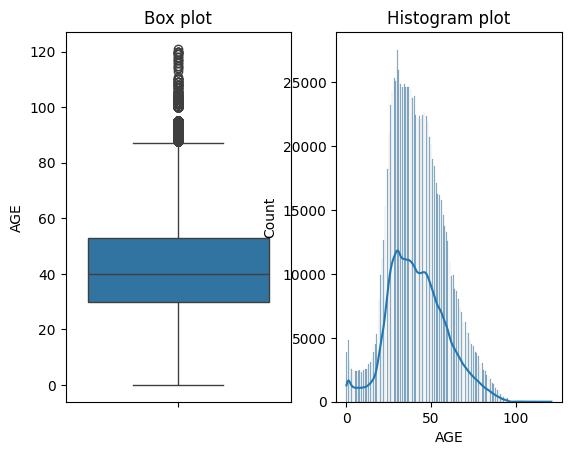

In [275]:
plt.subplot(1, 2, 1)
sns.boxplot(df['AGE'])
plt.title('Box plot')

plt.subplot(1, 2, 2)
sns.histplot(df['AGE'], kde = True)
plt.title('Histogram plot')
plt.show()

In [276]:
df['AGE'].shape

(1048575,)

### Since some age values are >100, going to remove them 

In [277]:
df = df[df['AGE'] <= 100].copy()

# 1. Patient Demographics

### Age Distribution

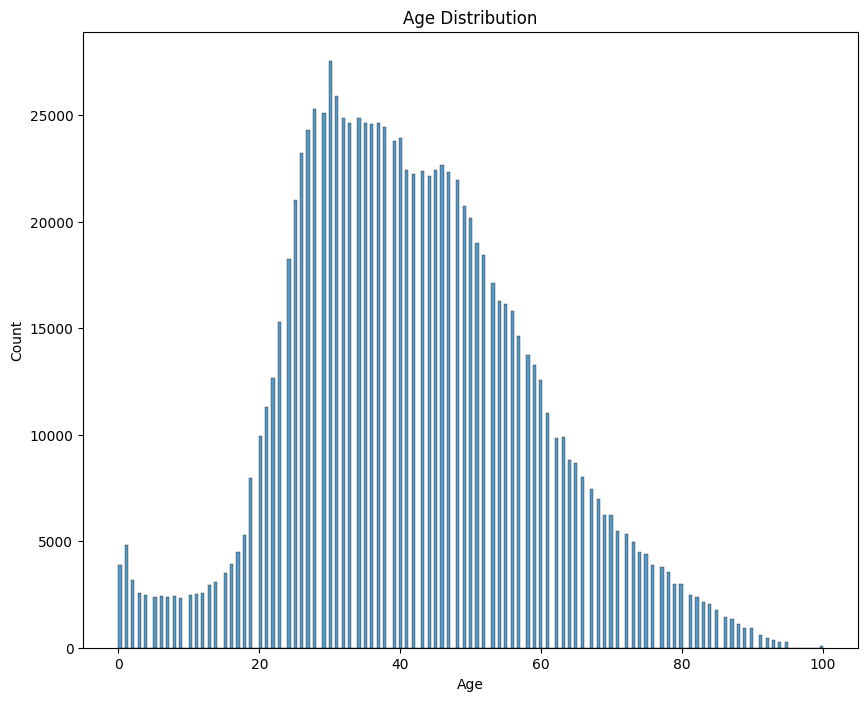

In [278]:
plt.figure(figsize = (10, 8))
sns.histplot(x = 'AGE', data = df)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### Gender distribution 

In [279]:
df['SEX'].value_counts(normalize = True)

SEX
Female    0.500741
Male      0.499259
Name: proportion, dtype: float64

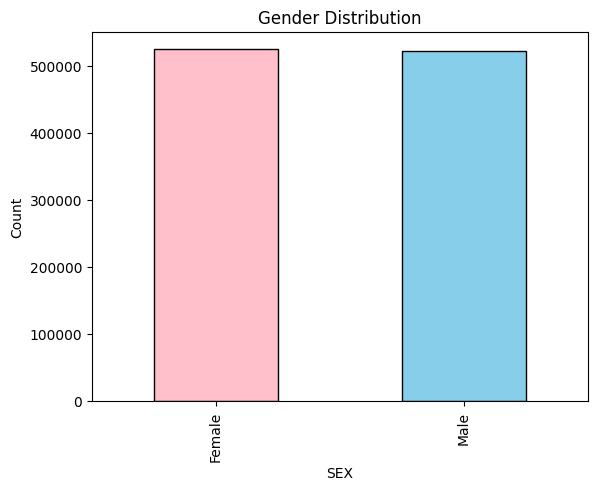

In [280]:
df['SEX'].value_counts().plot(kind='bar', color=['pink', 'skyblue'], edgecolor='black')
plt.title("Gender Distribution")
plt.ylabel("Count")
plt.show()

### Age distribution with Gender 

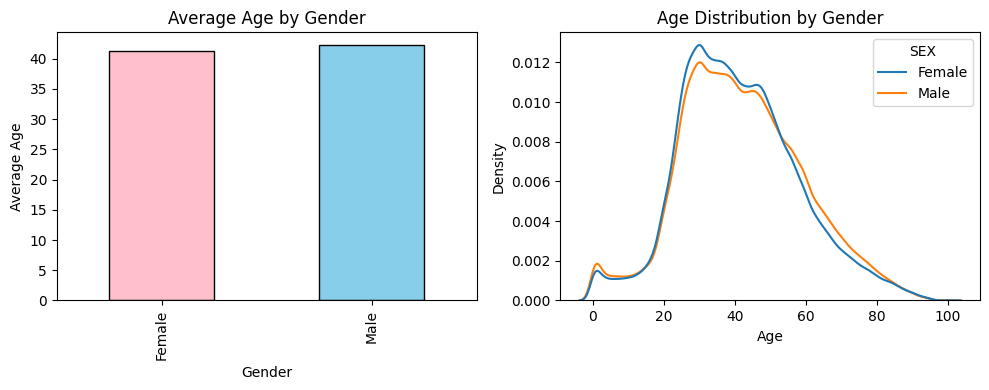

In [281]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
df.groupby('SEX')['AGE'].mean().plot(kind='bar', color=['pink', 'skyblue'], edgecolor='black')
plt.title("Average Age by Gender")
plt.xlabel('Gender')
plt.ylabel("Average Age")

plt.subplot(1, 2, 2)
sns.kdeplot(data=df, x="AGE", hue="SEX", fill=False)  
plt.title("Age Distribution by Gender")
plt.xlabel("Age")
plt.ylabel("Density")

plt.tight_layout()
plt.show()

### gender distribution vary by patient type

In [282]:
df.groupby('PATIENT_TYPE')['SEX'].value_counts()

PATIENT_TYPE  SEX   
Hospitalized  Male      118291
              Female     81706
Outpatient    Female    443289
              Male      405151
Name: count, dtype: int64

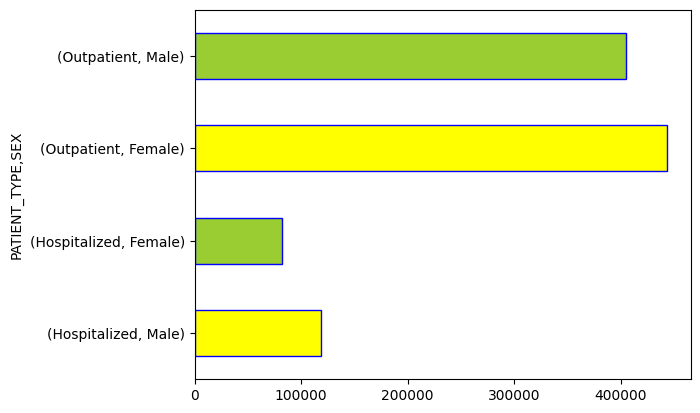

In [283]:
df.groupby('PATIENT_TYPE')['SEX'].value_counts().plot(kind = 'barh', color = ['yellow', 'yellowgreen'], edgecolor = ['blue'])
plt.show()

In [284]:
data = {'Actual count' : df['CLASIFFICATION_FINAL'].value_counts(), 'Percent' : df['CLASIFFICATION_FINAL'].value_counts(normalize = True)}
data001 = pd.DataFrame(data)
data001

,Actual count,Percent
CLASIFFICATION_FINAL,,
Invalid,499160,0.476099
Expert Judgement,381506,0.363881
Pending Result,128112,0.122193
Not COVID-19,26088,0.024883
Laboratory Test,8599,0.008202
Suspected Case,3121,0.002977
Epidemiologic Link,1851,0.001765


# 2. COVID-19 Classification

### Classification distribution 

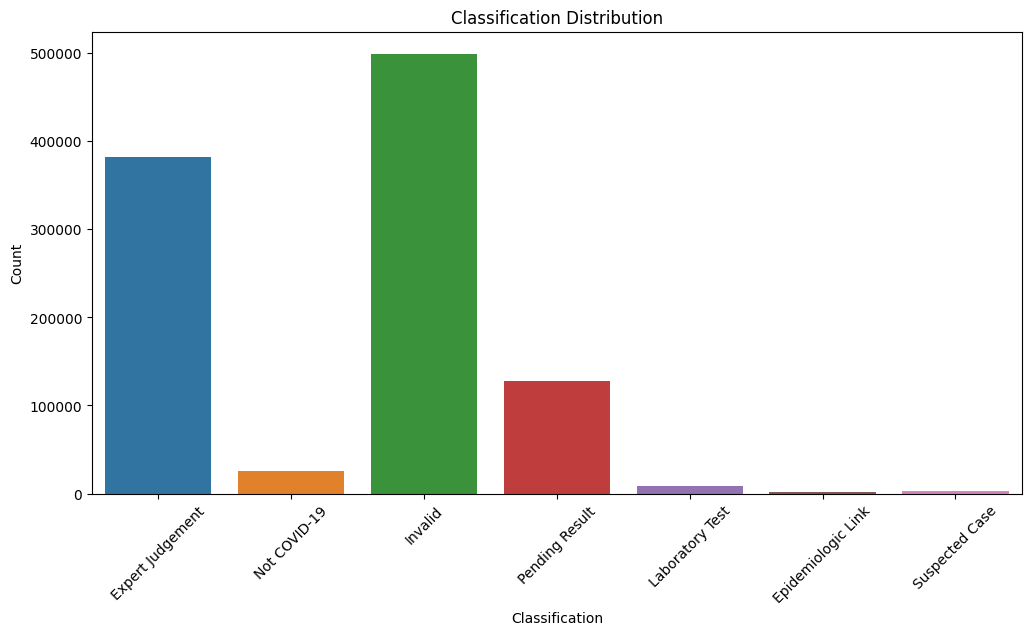

In [285]:
plt.figure(figsize=(12,6))
sns.countplot(x="CLASIFFICATION_FINAL", data=df, hue = "CLASIFFICATION_FINAL")
plt.title("Classification Distribution")
plt.xlabel("Classification")
plt.ylabel("Count")
plt.xticks(rotation = 45)
plt.show()

### Average distribution of COVID-19 classification across Age groups

In [286]:
df.groupby('CLASIFFICATION_FINAL')['AGE'].mean().astype(int)

CLASIFFICATION_FINAL
Epidemiologic Link    62
Expert Judgement      45
Invalid               39
Laboratory Test       43
Not COVID-19          41
Pending Result        39
Suspected Case        41
Name: AGE, dtype: int32

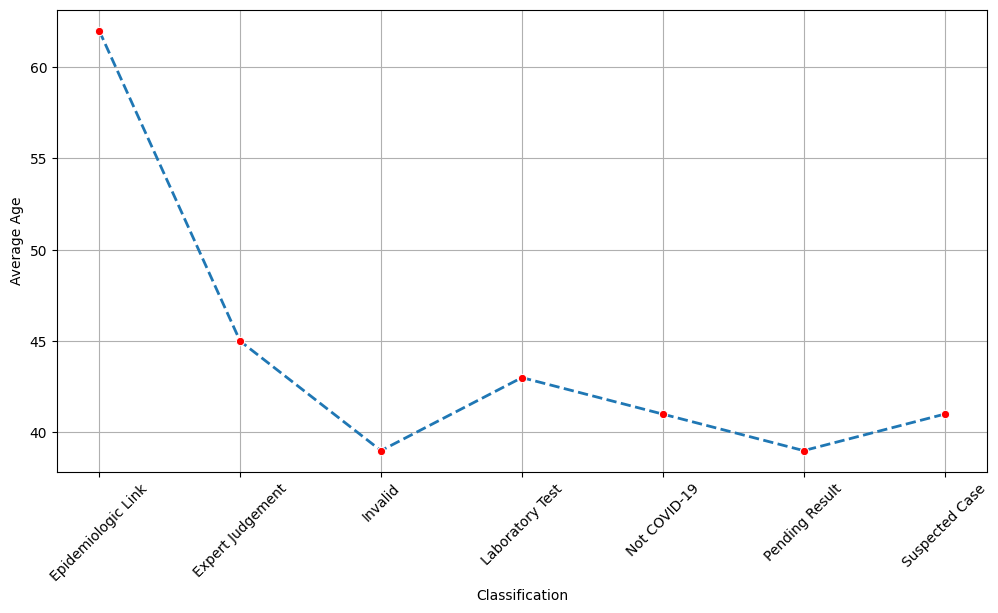

In [287]:
plt.figure(figsize=(12,6))
sns.lineplot(df.groupby('CLASIFFICATION_FINAL')['AGE'].mean().astype(int), marker = 'o',markerfacecolor="red",linestyle = '--', linewidth = 2)
plt.xticks(rotation = 45)
plt.xlabel('Classification')
plt.ylabel('Average Age')
plt.grid()
plt.show()

### Distribution of COVID-19 classification across Gender

In [288]:
df.groupby('CLASIFFICATION_FINAL')['SEX'].value_counts()

CLASIFFICATION_FINAL  SEX   
Epidemiologic Link    Male        1191
                      Female       660
Expert Judgement      Male      203700
                      Female    177806
Invalid               Female    264583
                      Male      234577
Laboratory Test       Male        4586
                      Female      4013
Not COVID-19          Male       13212
                      Female     12876
Pending Result        Male       64647
                      Female     63465
Suspected Case        Female      1592
                      Male        1529
Name: count, dtype: int64

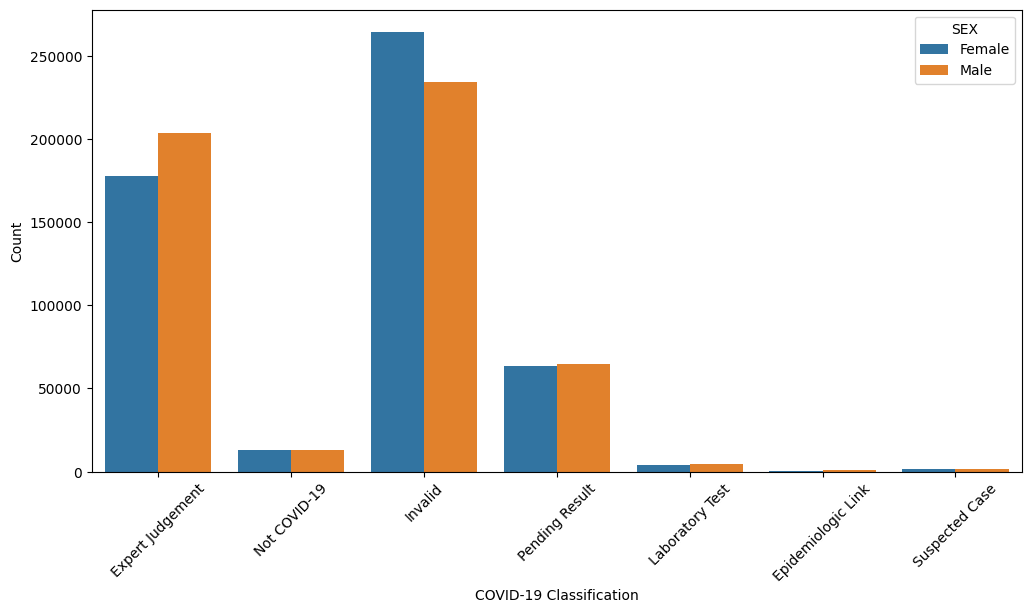

In [289]:
plt.figure(figsize=(12,6))
sns.countplot(x="CLASIFFICATION_FINAL", hue="SEX", data=df)
plt.xticks(rotation=45)
plt.xlabel("COVID-19 Classification")
plt.ylabel("Count")
plt.show()

### How does COVID-19 classification relate to patient type

In [290]:
df.groupby('CLASIFFICATION_FINAL')['PATIENT_TYPE'].value_counts()

CLASIFFICATION_FINAL  PATIENT_TYPE
Epidemiologic Link    Hospitalized      1685
                      Outpatient         166
Expert Judgement      Outpatient      274111
                      Hospitalized    107395
Invalid               Outpatient      433644
                      Hospitalized     65516
Laboratory Test       Outpatient        6397
                      Hospitalized      2202
Not COVID-19          Outpatient       20723
                      Hospitalized      5365
Pending Result        Outpatient      110883
                      Hospitalized     17229
Suspected Case        Outpatient        2516
                      Hospitalized       605
Name: count, dtype: int64

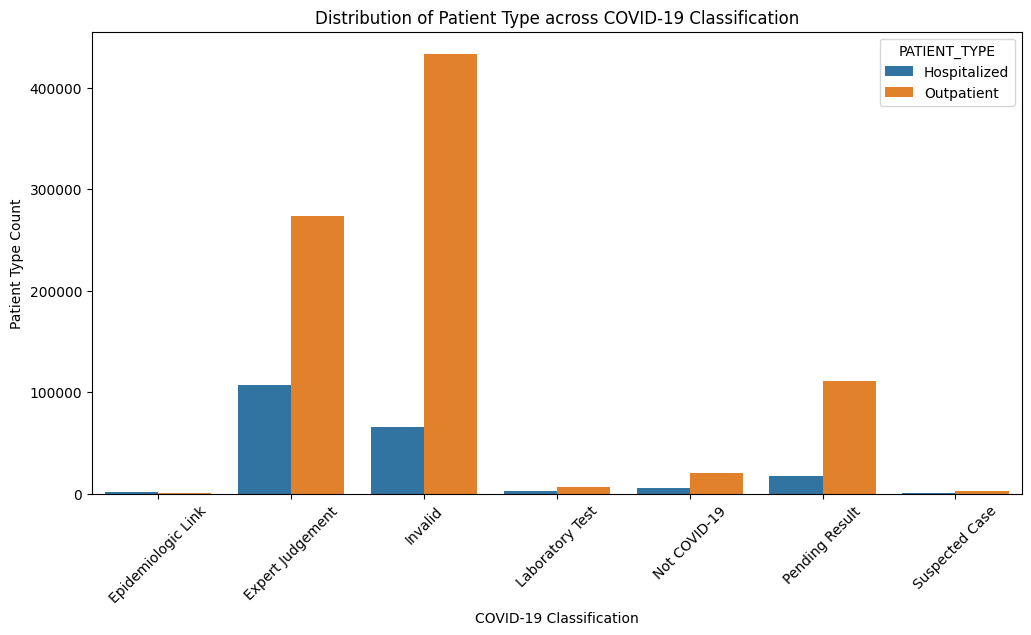

In [291]:
plt.figure(figsize=(12,6))
data = df.groupby(["CLASIFFICATION_FINAL", "PATIENT_TYPE"]).size().reset_index(name="Count")
sns.barplot(x="CLASIFFICATION_FINAL", y="Count", hue="PATIENT_TYPE", data=data)
plt.xlabel("COVID-19 Classification")
plt.ylabel("Patient Type Count")
plt.title("Distribution of Patient Type across COVID-19 Classification")
plt.xticks(rotation=45)
plt.show()


# 3. Comorbidities and Risk Factors

### Prevalence of each comorbidity (DIABETES, COPD, ASTHMA, etc.)

In [292]:
comorbidity_cols = ['PNEUMONIA', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO']

prevalence = (df[comorbidity_cols] == 'Yes').sum() / len(df) * 100
prevalence = prevalence.reset_index()
prevalence.columns = ['Comorbidity', 'Prevalence']
prevalence

,Comorbidity,Prevalence
0,PNEUMONIA,13.354069
1,DIABETES,11.920602
2,COPD,1.436042
3,ASTHMA,3.011149
4,INMSUPR,1.351059
5,HIPERTENSION,15.519101
6,OTHER_DISEASE,2.674362
7,CARDIOVASCULAR,1.980472
8,OBESITY,15.242213
9,RENAL_CHRONIC,1.802683


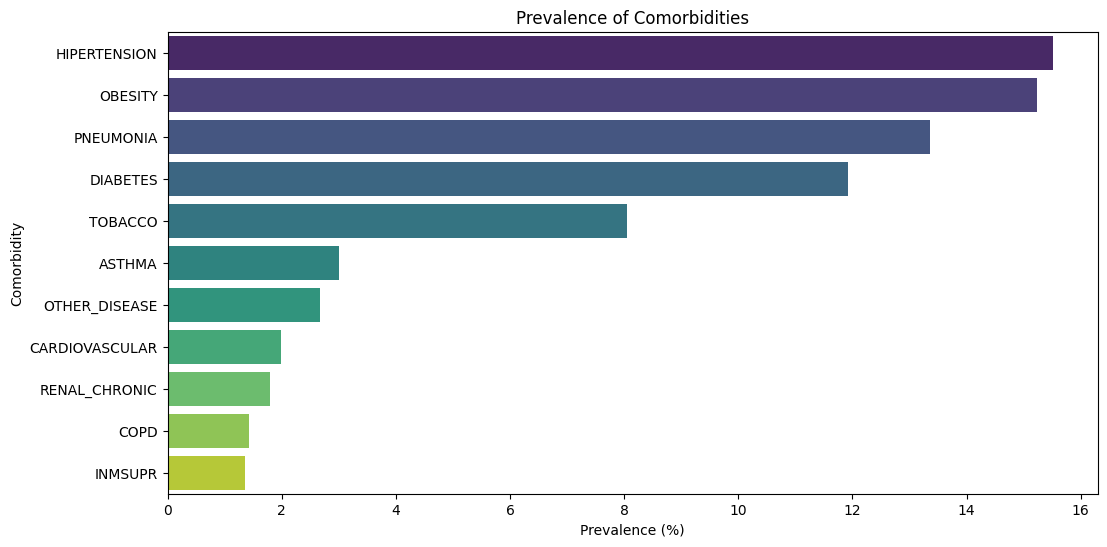

In [293]:
plt.figure(figsize=(12,6))
sns.barplot(data=prevalence.sort_values('Prevalence', ascending=False), x='Prevalence', y='Comorbidity', palette='viridis')

plt.title("Prevalence of Comorbidities")
plt.xlabel("Prevalence (%)")
plt.ylabel("Comorbidity")
plt.show()

### patients having multiple comorbidities

In [294]:
df_comorb = df[comorbidity_cols].applymap(lambda x: 1 if x == 'Yes' else 0).astype(int)

In [295]:
df_comorb['Total_comorbidities'] = df_comorb.sum(axis = 1)

In [296]:
df_comorb['Total_comorbidities'].unique()

array([ 2,  4,  1,  0,  5,  3,  6,  9,  7,  8, 10, 11], dtype=int64)

In [297]:
df_comorb['Total_comorbidities'].value_counts().sort_index()

Total_comorbidities
0     577948
1     264849
2     122196
3      54640
4      20455
5       5948
6       1707
7        436
8         97
9         53
10        90
11        18
Name: count, dtype: int64

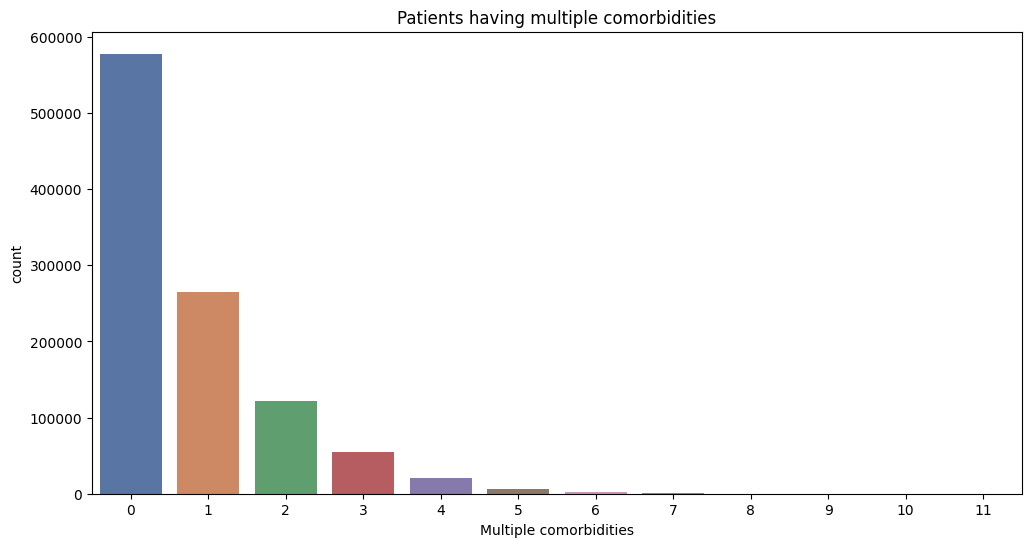

In [298]:
plt.figure(figsize=(12,6))
sns.barplot(df_comorb['Total_comorbidities'].value_counts().sort_index(), palette = 'deep')
plt.title('Patients having multiple comorbidities')
plt.xlabel('Multiple comorbidities')
plt.show()

### How does age correlate with having comorbidities

In [299]:
df_comorb['AGE'] = df['AGE']
df_comorb.groupby('Total_comorbidities')['AGE'].mean().sort_values(ascending = False)

Total_comorbidities
7     64.926606
6     63.558289
5     62.508911
8     61.113402
4     60.159814
3     56.921779
2     51.177960
9     48.490566
11    44.333333
1     43.576351
10    38.388889
0     36.536694
Name: AGE, dtype: float64

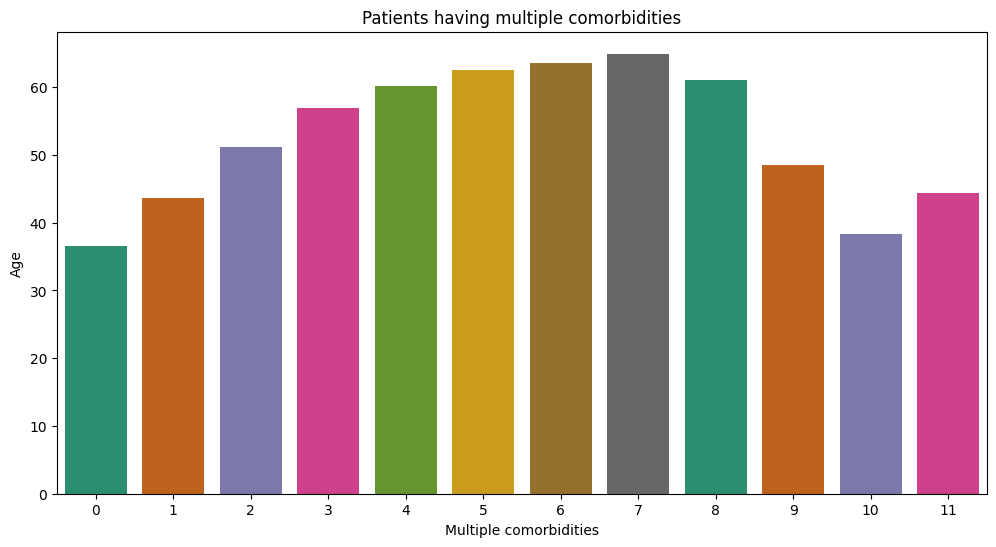

In [300]:
plt.figure(figsize=(12,6))
sns.barplot(df_comorb.groupby('Total_comorbidities')['AGE'].mean().sort_values(ascending = False), palette = 'Dark2')
plt.title('Patients having multiple comorbidities')
plt.xlabel('Multiple comorbidities')
plt.ylabel('Age')
plt.show()

### How does gender correlate with having comorbidities

In [301]:
df_comorb['SEX'] = df['SEX']
df_comorb.groupby('Total_comorbidities')['SEX'].value_counts()

Total_comorbidities  SEX   
0                    Female    302508
                     Male      275440
1                    Male      138587
                     Female    126262
2                    Male       65206
                     Female     56990
3                    Male       28967
                     Female     25673
4                    Male       10812
                     Female      9643
5                    Male        3165
                     Female      2783
6                    Male         907
                     Female       800
7                    Male         223
                     Female       213
8                    Male          53
                     Female        44
9                    Male          33
                     Female        20
10                   Female        47
                     Male          43
11                   Female        12
                     Male           6
Name: count, dtype: int64

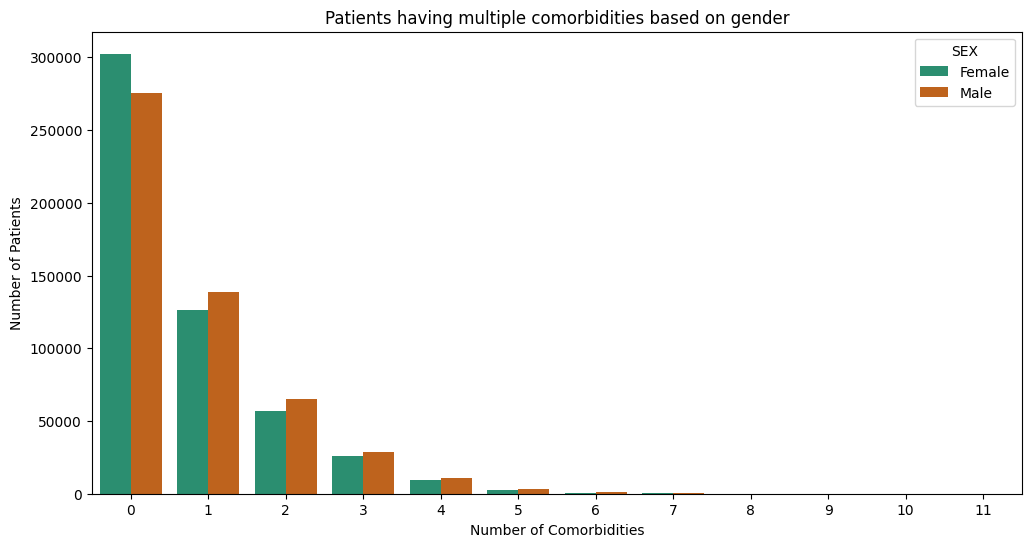

In [302]:
plt.figure(figsize=(12,6))
counts = df_comorb.groupby(['SEX', 'Total_comorbidities']).size().reset_index(name='Count')

sns.barplot(data=counts, x='Total_comorbidities', y='Count', hue='SEX', palette='Dark2')
plt.title('Patients having multiple comorbidities based on gender')
plt.xlabel('Number of Comorbidities')
plt.ylabel('Number of Patients')
plt.show()


# 4.  Death Analysis

### Dead vs Alive 

In [303]:
df['DEATH_STATUS'].value_counts(normalize = True)*100

DEATH_STATUS
ALIVE    92.662602
DEAD      7.337398
Name: proportion, dtype: float64

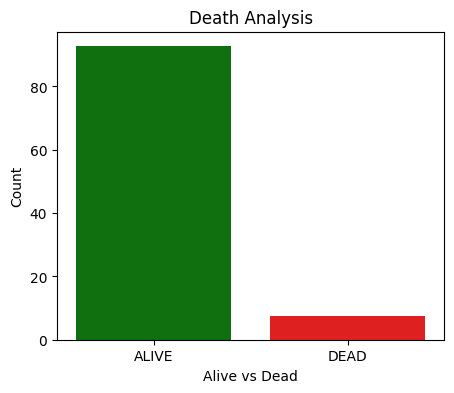

In [304]:
plt.figure(figsize=(5,4))
sns.barplot(df['DEATH_STATUS'].value_counts(normalize = True)*100, palette=['green', 'red'])
plt.title('Death Analysis')
plt.xlabel('Alive vs Dead')
plt.ylabel('Count')
plt.show()

### How does death status vary by age

In [305]:
counts = df.groupby(['AGE', 'DEATH_STATUS']).size().reset_index(name = 'Count')

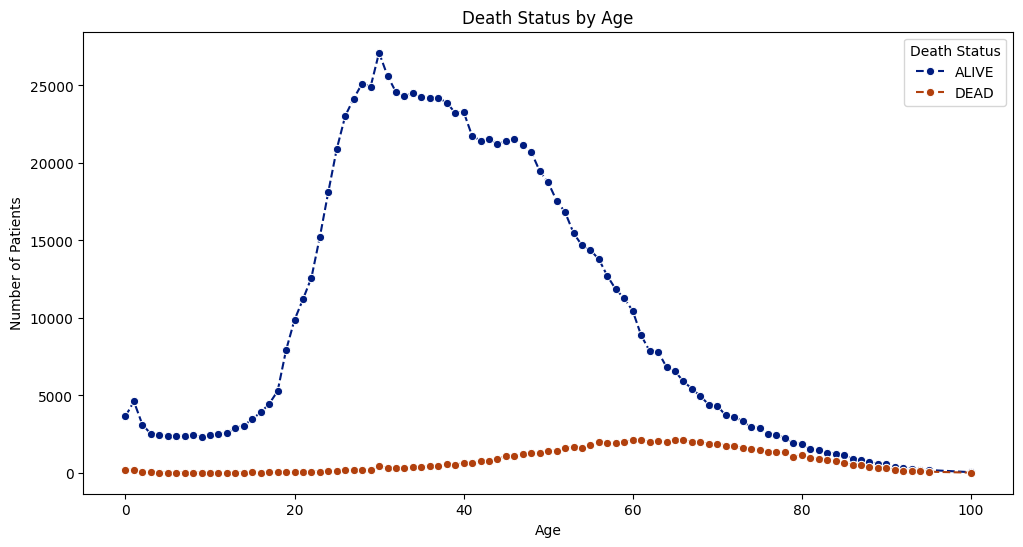

In [306]:
plt.figure(figsize=(12,6))
sns.lineplot(data=counts, x='AGE', y='Count', hue='DEATH_STATUS', marker='o', linestyle = '--', palette='dark')
plt.title('Death Status by Age')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.legend(title='Death Status')
plt.show()

### How does death status vary by gender?

In [307]:
counts = df.groupby(['DEATH_STATUS','SEX']).size().reset_index(name = 'Count')
counts

,DEATH_STATUS,SEX,Count
0,ALIVE,Female,497601
1,ALIVE,Male,473908
2,DEAD,Female,27394
3,DEAD,Male,49534


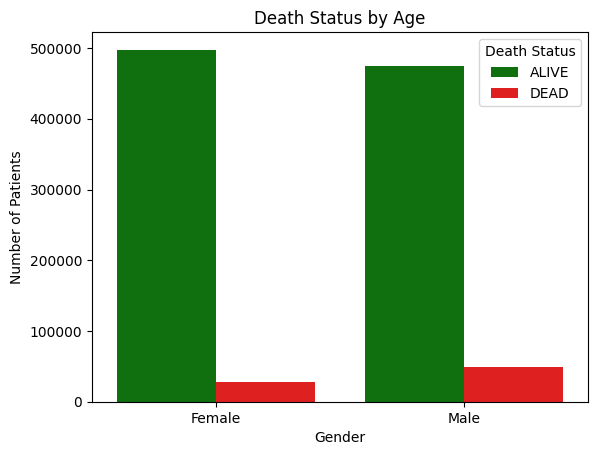

In [308]:
sns.barplot(data=counts, x='SEX', y='Count', hue='DEATH_STATUS', palette=['green', 'red'])
plt.title('Death Status by Age')
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.legend(title='Death Status')
plt.show()

### Death status vary by COVID-19 classification

In [309]:
counts = df.groupby(['DEATH_STATUS','CLASIFFICATION_FINAL']).size().reset_index(name = 'Count')
counts

,DEATH_STATUS,CLASIFFICATION_FINAL,Count
0,ALIVE,Expert Judgement,330083
1,ALIVE,Invalid,485470
2,ALIVE,Laboratory Test,7645
3,ALIVE,Not COVID-19,24877
4,ALIVE,Pending Result,120461
5,ALIVE,Suspected Case,2973
6,DEAD,Epidemiologic Link,1851
7,DEAD,Expert Judgement,51423
8,DEAD,Invalid,13690
9,DEAD,Laboratory Test,954


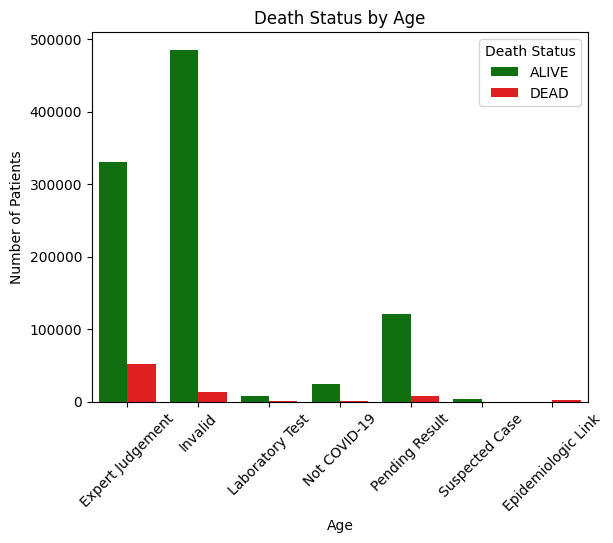

In [310]:
sns.barplot(data=counts, x='CLASIFFICATION_FINAL', y='Count', hue='DEATH_STATUS', palette=['green', 'red'])
plt.title('Death Status by Age')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.legend(title='Death Status')
plt.xticks(rotation = 45)
plt.show()

# 5. Medical Units and Care

### How are patients distributed across USMER levels?

In [311]:
df['USMER'].value_counts()

USMER
Level-2    662815
Level-1    385622
Name: count, dtype: int64

In [312]:
counts = df.groupby(['USMER', 'PATIENT_TYPE']).size().reset_index(name = 'Column')

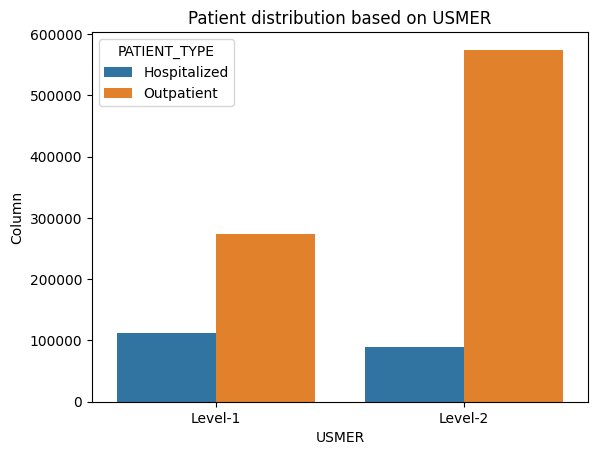

In [313]:
sns.barplot(x = 'USMER',y = 'Column', hue = 'PATIENT_TYPE', data = counts)
plt.title('Patient distribution based on USMER')
plt.show()

### How does death status vary by USMER level or medical unit type?

In [314]:
counts = df.groupby(['USMER', 'DEATH_STATUS']).size().reset_index(name = 'Column')

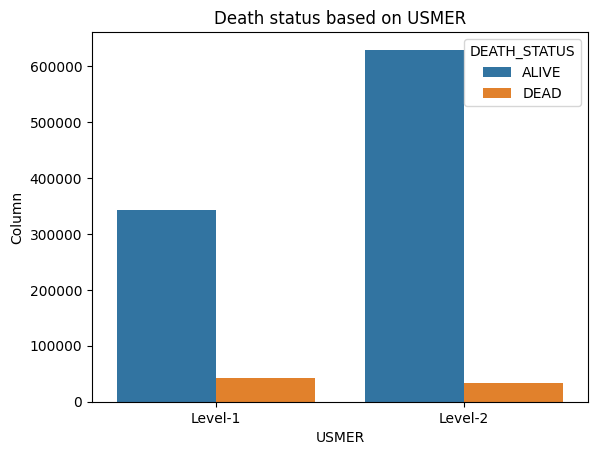

In [315]:
sns.barplot(x = 'USMER',y = 'Column', hue = 'DEATH_STATUS', data = counts)
plt.title('Death status based on USMER')
plt.show()